In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TRAIN.csv to TRAIN.csv


In [ ]:
df=pd.read_csv('TRAIN.csv')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
# checking null values if any
df.isnull().sum()

id              0
label           0
tweet           0
clean_tweets    0
dtype: int64

In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['clean_tweets'] = df['tweet'].apply(cleanTxt)

# Show the cleaned tweets
df

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso con..."


In [19]:
# individual words are been taken as tokens
tokenized_tweet = df['clean_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4              [factsguide:, society, now, motivation]
Name: clean_tweets, dtype: object

In [20]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, lyft, credit, i, can't, use, caus...
2                              [bihday, your, majesti]
3    [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide:, societi, now, motiv]
Name: clean_tweets, dtype: object

now that we have taken words seperately, we have to **remove** few words like;'a,the,any,etc' OR the words which are **smaller than** **3** alphabets

In [22]:
# remove short words
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()


,id,label,tweet,clean_tweets,Subjectivity,Polarity
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,1.0,-0.500000
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit can't cause they don't offe...,0.2,0.200000
2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000
3,4,0,#model i love u take with u all the time in ...,model love take with time urð±!!! ððð...,0.6,0.976562
4,5,0,factsguide: society now #motivation,factsguide: society motivation,0.0,0.000000


In [23]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweets'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweets,Subjectivity,Polarity
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...,1.0,-0.500000
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for lyft credit i can't use caus they do...,0.2,0.200000
2,3,0,bihday your majesty,bihday your majesti,0.0,0.000000
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...,0.6,0.976562
4,5,0,factsguide: society now #motivation,factsguide: societi now motiv,0.0,0.000000


In [26]:
from wordcloud import WordCloud

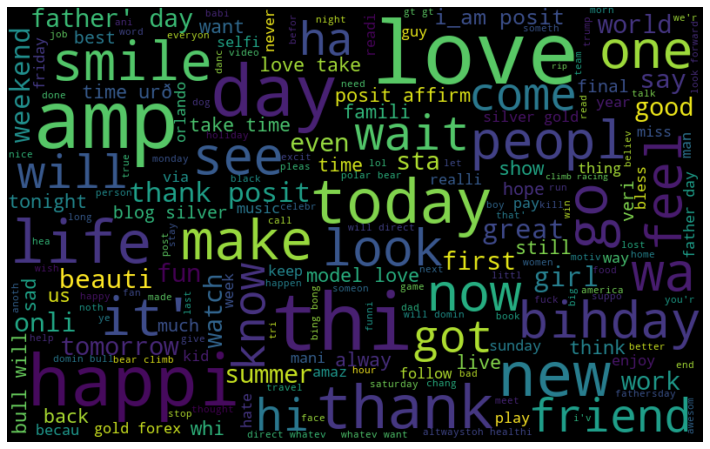

In [27]:
# lets see the most frequently used words
all_words = " ".join([sentence for sentence in df['clean_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


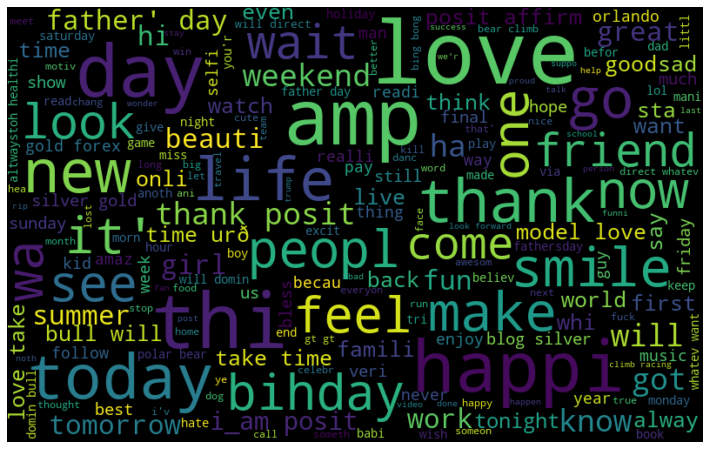

In [34]:
# frequently used positive words
all_words = " ".join([sentence for sentence in df['clean_tweets'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# Print the percentage of positive tweets
ptweets = df[df['label']==0]
ptweets = ptweets['clean_tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

93.0

So, 93% of tweets made by people are positive(good sign for the society **:)**)

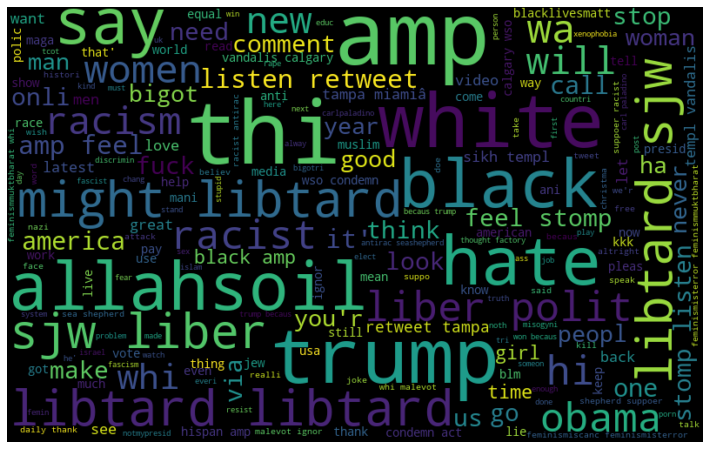

In [35]:
# frequently used negative words
all_words = " ".join([sentence for sentence in df['clean_tweets'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
# Print the percentage of negative tweets
ptweets = df[df['label']==1]
ptweets = ptweets['clean_tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

7.0

In [46]:
# Show the number of +ve or -ve tweet counts
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [77]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweets'])

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [82]:
# training the model
model= LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# now testing it
pred = model.predict(x_test)
f1_score(y_test, pred)

0.5111896348645466

In [98]:
print("Accuracy:",accuracy_score(y_test, pred)*100)

Accuracy: 94.80665748967589


In [95]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
f1_score(y_test, y_pred)

0.5505925250683684

In [99]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 93.83055937930172
